# Pandas 簡介

## Pandas 是 Python 裡面被用來作資料分析及整理最常用的套件。

### 這一份筆記主要說明以下重點：

* 資料結構及其基本操作
  - Series
  - DataFrame
* 網路資料存取
* 資料視覺化
* 資料分組及聚合

參考資料：

* [Python Data Analysis Library](http://pandas.pydata.org/)
* [Pandas Cookbook](http://pandas.pydata.org/pandas-docs/version/0.18.0/cookbook.html)
* [Pandas 入門介紹](https://github.com/Wei1234c/Introduction_to_Pandas)
* [Financial Time Series](https://github.com/yhilpisch/py4fi/blob/master/ipython3/06_Financial_Time_Series.ipynb)
* [Pandas API references](http://pandas.pydata.org/pandas-docs/stable/api.html#api-dataframe-stats)

In [1]:
import pandas as pd

pd.__version__

'1.3.4'

In [2]:
%matplotlib inline

import numpy as np
from datetime import datetime

## Pandas 的資料結構

### Series

In [3]:
s = pd.Series([1, 2, 3, 4, 5])
s

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [6]:
u = pd.Series([1, 2, 3, 4, 5])

In [7]:
s+u

0     2
1     4
2     6
3     8
4    10
dtype: int64

#### Series 跟 ndarray 有什麼不同呢？

In [8]:
s.values

array([1, 2, 3, 4, 5], dtype=int64)

In [9]:
s.index

RangeIndex(start=0, stop=5, step=1)

#### index 可以在創建 Series 時指定

In [10]:
s = pd.Series(range(5), index=list('abcde'))

In [11]:
s

a    0
b    1
c    2
d    3
e    4
dtype: int64

In [12]:
u.index = list('bcdef')

In [13]:
u

b    1
c    2
d    3
e    4
f    5
dtype: int64

In [14]:
s+u

a    NaN
b    2.0
c    4.0
d    6.0
e    8.0
f    NaN
dtype: float64

#### index 也可以在創建完 Series 後指定

In [ ]:
s.index = list('fghij')
s

#### 什麼是 reindex？

In [15]:
s.reindex(list('hijabcd'))

h    NaN
i    NaN
j    NaN
a    0.0
b    1.0
c    2.0
d    3.0
dtype: float64

In [16]:
s

a    0
b    1
c    2
d    3
e    4
dtype: int64

In [17]:
s.dtype

dtype('int64')

In [18]:
s.shape

(5,)

### DataFrame

In [19]:
data = np.random.randn(10, 4)

In [20]:
df = pd.DataFrame(data)
df

,0,1,2,3
0,1.982231,0.620001,0.158268,0.962065
1,-0.400261,-0.576531,0.980601,0.317331
2,0.272691,-0.657567,-0.275869,0.815325
3,0.714238,-1.095269,1.137020,-1.157445
4,0.873165,0.036381,0.190656,-0.254953
5,-0.440756,-0.055469,0.045051,1.969517
6,-0.276417,-0.487820,1.392265,0.160565
7,-1.730829,0.002668,-0.276775,-0.568242
8,-0.332232,-0.791057,0.416602,-0.106758
9,0.160832,-0.565030,0.110545,-0.779896


In [21]:
df.columns = ['No1', 'No2', 'No3', 'No4']
df

,No1,No2,No3,No4
0,1.982231,0.620001,0.158268,0.962065
1,-0.400261,-0.576531,0.980601,0.317331
2,0.272691,-0.657567,-0.275869,0.815325
3,0.714238,-1.095269,1.137020,-1.157445
4,0.873165,0.036381,0.190656,-0.254953
5,-0.440756,-0.055469,0.045051,1.969517
6,-0.276417,-0.487820,1.392265,0.160565
7,-1.730829,0.002668,-0.276775,-0.568242
8,-0.332232,-0.791057,0.416602,-0.106758
9,0.160832,-0.565030,0.110545,-0.779896


In [22]:
df.index = pd.date_range('2016-01-01', periods=10)
df

,No1,No2,No3,No4
2016-01-01,1.982231,0.620001,0.158268,0.962065
2016-01-02,-0.400261,-0.576531,0.980601,0.317331
2016-01-03,0.272691,-0.657567,-0.275869,0.815325
2016-01-04,0.714238,-1.095269,1.137020,-1.157445
2016-01-05,0.873165,0.036381,0.190656,-0.254953
2016-01-06,-0.440756,-0.055469,0.045051,1.969517
2016-01-07,-0.276417,-0.487820,1.392265,0.160565
2016-01-08,-1.730829,0.002668,-0.276775,-0.568242
2016-01-09,-0.332232,-0.791057,0.416602,-0.106758
2016-01-10,0.160832,-0.565030,0.110545,-0.779896


In [23]:
df.loc['2016-01-06']

No1   -0.440756
No2   -0.055469
No3    0.045051
No4    1.969517
Name: 2016-01-06 00:00:00, dtype: float64

In [24]:
df.drop(datetime(2016, 1, 3), inplace=True)
df

,No1,No2,No3,No4
2016-01-01,1.982231,0.620001,0.158268,0.962065
2016-01-02,-0.400261,-0.576531,0.980601,0.317331
2016-01-04,0.714238,-1.095269,1.137020,-1.157445
2016-01-05,0.873165,0.036381,0.190656,-0.254953
2016-01-06,-0.440756,-0.055469,0.045051,1.969517
2016-01-07,-0.276417,-0.487820,1.392265,0.160565
2016-01-08,-1.730829,0.002668,-0.276775,-0.568242
2016-01-09,-0.332232,-0.791057,0.416602,-0.106758
2016-01-10,0.160832,-0.565030,0.110545,-0.779896


In [25]:
df.index=range(9)
df

,No1,No2,No3,No4
0,1.982231,0.620001,0.158268,0.962065
1,-0.400261,-0.576531,0.980601,0.317331
2,0.714238,-1.095269,1.137020,-1.157445
3,0.873165,0.036381,0.190656,-0.254953
4,-0.440756,-0.055469,0.045051,1.969517
5,-0.276417,-0.487820,1.392265,0.160565
6,-1.730829,0.002668,-0.276775,-0.568242
7,-0.332232,-0.791057,0.416602,-0.106758
8,0.160832,-0.565030,0.110545,-0.779896


In [26]:
df.iloc[1]

No1   -0.400261
No2   -0.576531
No3    0.980601
No4    0.317331
Name: 1, dtype: float64

In [27]:
df.drop(4)

,No1,No2,No3,No4
0,1.982231,0.620001,0.158268,0.962065
1,-0.400261,-0.576531,0.980601,0.317331
2,0.714238,-1.095269,1.137020,-1.157445
3,0.873165,0.036381,0.190656,-0.254953
5,-0.276417,-0.487820,1.392265,0.160565
6,-1.730829,0.002668,-0.276775,-0.568242
7,-0.332232,-0.791057,0.416602,-0.106758
8,0.160832,-0.565030,0.110545,-0.779896


## 使用 Pandas 作資料存取

### 這一部分包括底下幾個重點：

* read_csv() 的使用
* read_html() 的使用
* 如何抓取股市資訊？

底下練習一下將 [台灣證券交易所 - 加權股價指數歷史資料](http://www.tse.com.tw/ch/trading/indices/MI_5MINS_HIST/MI_5MINS_HIST.php#) 的資料轉成 DataFrame。

### 使用 read_csv() 讀取資料

參考連結：[pandas.read_csv](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)

In [ ]:
df = pd.read_csv("data/MI_5MINS_HIST10603.csv", encoding="Big5", header=1)

In [ ]:
df

In [ ]:
df.drop(df.index[len(df.index)-1], inplace=True)
df

### 使用 read_html() 讀取資料

參考連結：[pandas.read_html](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_html.html)

In [ ]:
import requests
from bs4 import BeautifulSoup

In [ ]:
r = requests.get("http://www.tse.com.tw/ch/trading/indices/MI_5MINS_HIST/MI_5MINS_HIST.php")
r.encoding = 'Big5'

In [ ]:
soup = BeautifulSoup(r.text, "lxml")
tables = soup.select("table.board_trad")
tables

In [ ]:
type(tables[0])

In [ ]:
df_list = pd.read_html(str(tables[0]), header=1)

In [ ]:
df_list[0]

### 使用 Pandas 讀取股價資訊

參考資料：[pandas-datareadre 說明文件](https://pandas-datareader.readthedocs.io/en/latest/)

In [ ]:
import pandas_datareader.data as web
from datetime import datetime

In [ ]:
df = web.DataReader("TSLA", 'google', datetime(2016,1,1))
df['Close'].plot()

## 資料視覺化

Series 跟 DataFrame 都附帶有一個產生各類圖表的 plot()，預設的情況下，它會產生線形圖。

參考資料：[Pandas Plotting](http://pandas.pydata.org/pandas-docs/stable/visualization.html)

<AxesSubplot:>

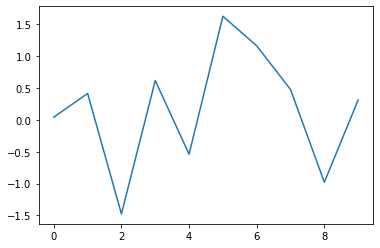

In [28]:
s = pd.Series(np.random.randn(10), index=np.arange(10))
s.plot()

<AxesSubplot:>

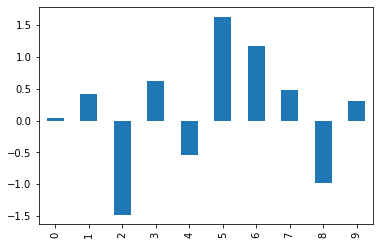

In [29]:
s.plot(kind="bar")

<AxesSubplot:>

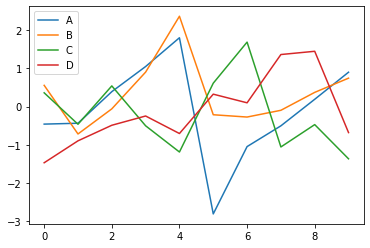

In [30]:
df = pd.DataFrame(np.random.randn(10, 4), columns=list('ABCD'))
df.plot()

<AxesSubplot:>

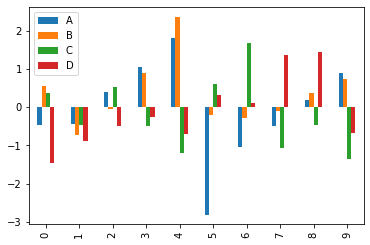

In [31]:
df.plot(kind='bar')

## 資料分組與聚合

In [32]:
data = np.random.randn(10, 4)

In [33]:
df = pd.DataFrame(data, columns=['No1', 'No2', 'No3', 'No4'])
df

,No1,No2,No3,No4
0,0.029700,0.336919,0.025761,0.170063
1,-0.527215,0.599172,-0.790287,-1.123522
2,-1.186640,-0.175166,-1.705550,-0.186076
3,0.699091,-0.277762,-0.465226,0.644722
4,0.664370,0.080939,-1.593522,-0.552750
5,1.424085,-0.309231,-0.352610,-0.020019
6,0.390912,1.299206,0.430722,-1.133183
7,1.411226,-0.022598,-0.427621,-1.422548
8,0.171136,0.671323,0.439154,-0.424286
9,-0.137286,-1.429296,0.384975,-0.127250


In [34]:
df['Category'] = np.NaN
df

,No1,No2,No3,No4,Category
0,0.029700,0.336919,0.025761,0.170063,NaN
1,-0.527215,0.599172,-0.790287,-1.123522,NaN
2,-1.186640,-0.175166,-1.705550,-0.186076,NaN
3,0.699091,-0.277762,-0.465226,0.644722,NaN
4,0.664370,0.080939,-1.593522,-0.552750,NaN
5,1.424085,-0.309231,-0.352610,-0.020019,NaN
6,0.390912,1.299206,0.430722,-1.133183,NaN
7,1.411226,-0.022598,-0.427621,-1.422548,NaN
8,0.171136,0.671323,0.439154,-0.424286,NaN
9,-0.137286,-1.429296,0.384975,-0.127250,NaN


In [35]:
clist = ['C1'] * 3 + ['C2'] * 5 + ['C3'] * 2

In [36]:
df['Category'] = np.random.permutation(clist)

In [37]:
df

,No1,No2,No3,No4,Category
0,0.029700,0.336919,0.025761,0.170063,C2
1,-0.527215,0.599172,-0.790287,-1.123522,C3
2,-1.186640,-0.175166,-1.705550,-0.186076,C2
3,0.699091,-0.277762,-0.465226,0.644722,C2
4,0.664370,0.080939,-1.593522,-0.552750,C1
5,1.424085,-0.309231,-0.352610,-0.020019,C2
6,0.390912,1.299206,0.430722,-1.133183,C3
7,1.411226,-0.022598,-0.427621,-1.422548,C1
8,0.171136,0.671323,0.439154,-0.424286,C1
9,-0.137286,-1.429296,0.384975,-0.127250,C2


In [38]:
groups = df.groupby('Category')

In [39]:
groups

In [40]:
groups.mean()

,No1,No2,No3,No4
Category,,,,
C1,0.748911,0.243222,-0.527330,-0.799862
C2,0.165790,-0.370907,-0.422530,0.096288
C3,-0.068151,0.949189,-0.179783,-1.128353
